# Homework 2. Exploratory Data Analysis


---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

# importing libraries for you'll need for this homework
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats 

## Problem 1

In class, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Download [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) into the same directory as this notebook. For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the first few lines of each table using the head method on each table.


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 


Step 1:  Subset the dataset describing the salaries of all teams in the year 2000 and assign it to a variable, like, 'salaries'.  Hint:  You may want to divide this by 1e6, so that when you plot these values it is more readable.  Also, subset the number of wins, assigning it to an appropriate variable.


Using our summarized DataFrame in 1(c), we will create a scatter plot to graphically display the relationship between total wins and total salaries for a given year. Because each team is represented by one point, we can annotate specific points by the team name. In this case, we will consider the Oakland baseball team.  The `teamID` for Oakland is OAK, so we will add the `OAK` annotation on the scatter plot.  You could have used any color, shapes, etc for the annotation of the team name. 

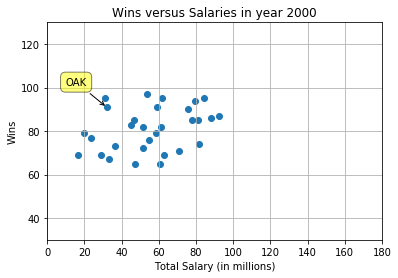

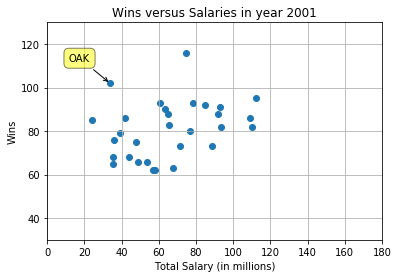

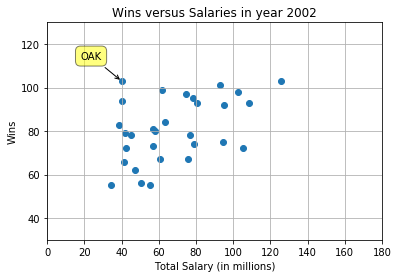

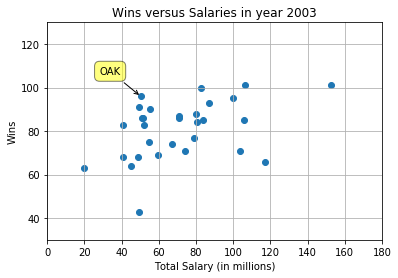

In [22]:
teamName = 'OAK'
years = np.arange(2000, 2004)

for yr in years: 
    df = joined[joined['yearID'] == yr]
    plt.scatter(df['salary'] / 1e6, df['W'])
    plt.title('Wins versus Salaries in year ' + str(yr))
    plt.xlabel('Total Salary (in millions)')
    plt.ylabel('Wins')
    plt.xlim(0, 180)
    plt.ylim(30, 130)
    plt.grid()
    plt.annotate(teamName, 
        xy = (df['salary'][df['teamID'] == teamName] / 1e6,  df['W'][df['teamID'] == teamName]), 
        xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', facecolor = 'black' , connectionstyle = 'arc3,rad=0'))
    plt.show()

We see a competitive advantage can be detected in years 2001-2003 for the Oakland baseball team, because in those years Oakland spent much less in salary compared to other teams, but stood out with the number of wins.  

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [11]:
#your code here

For each year, we perform the following: 

1. Calculate the least squares estimate of the coefficients in a linear regression model where x = salaries (in millions) and y = total wins. 
2. Calculate the residuals for each team: $$e_i = y_i - \hat{y}_i$$
3. Plot the residuals for each team across time. 


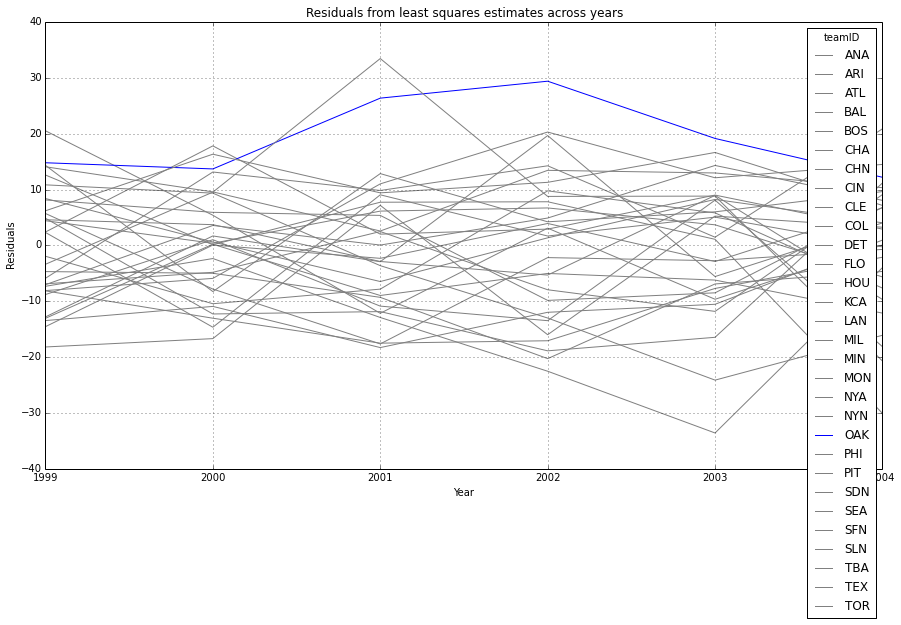

In [12]:
teamName = 'OAK'
years = np.arange(1999, 2005)
residData = pd.DataFrame()

for yr in years: 
    df = joined[joined['yearID'] == yr]
    x_list = df['salary'].values / 1e6
    y_list = df['W'].values

    # least squares estimates
    A = np.array([x_list, np.ones(len(x_list))])
    y = y_list
    w = np.linalg.lstsq(A.T,y)[0] # coefficients
    yhat = (w[0]*x_list+w[1]) # regression line
    residData[yr] = y - yhat
  
residData.index = df['teamID']
residData = residData.T
residData.index = residData.index.format()

residData.plot(title = 'Residuals from least squares estimates across years', figsize = (15, 8),
               color=map(lambda x: 'blue' if x=='OAK' else 'gray',df.teamID))
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

Considering the plots from 1(d) and 1(e), we see the Oakland baseball team stood out amongst the other baseball teams in terms of their ability to win a large amount of games with a small budget from 2001-2003.  Upon futher reading, we can attributed this to Billy Beane's effort to use "sabermetrics" (or the empirical analysis of baseball data) at the Oakland A's. He was able to find the most undervalued players and baseball and hire them on a reduced budget.  

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [3]:
#your code here

url = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
s = StringIO.StringIO(requests.get(url).content)
countries = pd.read_csv(s)
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [4]:
#your code here

income_link = 'https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xls'
source = StringIO.StringIO(requests.get(income_link).content)
income = pd.read_excel(source, sheetname = "Data")
income.head()

,gdp pc test,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,472.053500,472.053500,472.053500,472.053500,472.053500,472.053500,472.053500,472.053500,472.053500,...,785.127571,804.717458,874,887.914578,983.652314,984.805841,1154.859365,1214.613653,1261.354184,1349.696941
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,601.215222,601.839631,602.464688,603.090394,603.716751,604.343757,604.971415,605.599725,606.228687,...,4855.210024,5115.252837,5369,5652.049321,5958.021197,6365.530359,6550.896164,6746.445312,6914.267317,6969.306283
4,Algeria,766.253664,766.234779,766.215895,766.197011,766.178127,766.159244,766.140362,766.121480,766.102598,...,5576.851564,5790.967692,6011,6022.270940,6133.782763,6162.719840,6173.729741,6300.648214,6354.640523,6419.127829


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [5]:
#your code here

income.index=income[income.columns[0]] # Make the countries as the index
income = income.drop(income.columns[0], axis = 1) 
income.columns = map(lambda x: int(x), income.columns) # Convert years from floats to ints
income = income.transpose()
income.head()

gdp pc test,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Western Sahara,Vietnam,Virgin Islands (U.S.),Yemen Arab Republic (Former),Yemen Democratic (Former),"Yemen, Rep.",Yugoslavia,Zambia,Zimbabwe,Åland
1800,NaN,472.0535,NaN,601.215222,766.253664,674.453726,1260.123256,359.932582,775.668711,538.376199,...,NaN,459.708986,NaN,NaN,NaN,661.902376,NaN,364.464811,372.818338,NaN
1801,NaN,472.0535,NaN,601.839631,766.234779,674.453726,1262.214402,359.932582,775.668711,538.376199,...,NaN,459.708986,NaN,NaN,NaN,662.058563,NaN,364.464811,372.818338,NaN
1802,NaN,472.0535,NaN,602.464688,766.215895,674.453726,1264.309018,359.932582,775.668711,538.376199,...,NaN,459.708986,NaN,NaN,NaN,662.214787,NaN,364.464811,372.818338,NaN
1803,NaN,472.0535,NaN,603.090394,766.197011,674.453726,1266.407109,359.932582,775.668711,538.376199,...,NaN,459.708986,NaN,NaN,NaN,662.371047,NaN,364.464811,372.818338,NaN
1804,NaN,472.0535,NaN,603.716751,766.178127,674.453726,1268.508683,359.932582,775.668711,538.376199,...,NaN,459.708986,NaN,NaN,NaN,662.527345,NaN,364.464811,372.818338,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

In [6]:
#your code here

Here we use a histogram to plot the distribution of income per person in a given year across all the countries on the dollar scale and the log10(dollar) scale. 

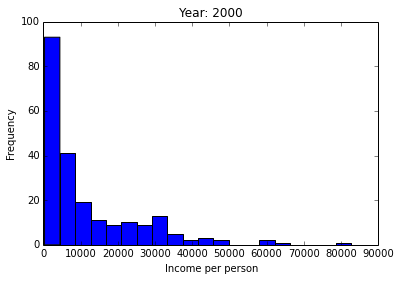

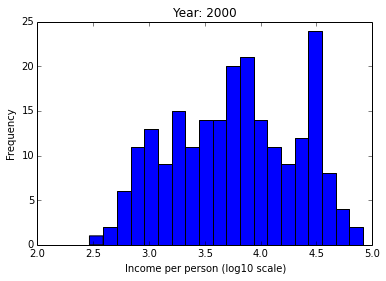

In [10]:
year = 2000
plt.plot(subplots=True)
plt.hist(income.ix[year].dropna().values, bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Income per person')
plt.ylabel('Frequency')
plt.show()

plt.hist(np.log10(income.ix[year].dropna().values), bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Income per person (log10 scale)')
plt.ylabel('Frequency')
plt.show()


#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [18]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here

def mergeByYear(year):
    data = pd.DataFrame(income.ix[year].values, columns = ['Income'])
    data['Country'] = income.columns
    joined = pd.merge(data, countries, how="inner", on=['Country'])
    joined.Income = np.round(joined.Income, 2)
    return joined

mergeByYear(2010).head()

,Income,Country,Region
0,1214.61,Afghanistan,ASIA
1,6746.45,Albania,EUROPE
2,6300.65,Algeria,AFRICA
3,33052.28,Andorra,EUROPE
4,5497.62,Angola,AFRICA


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

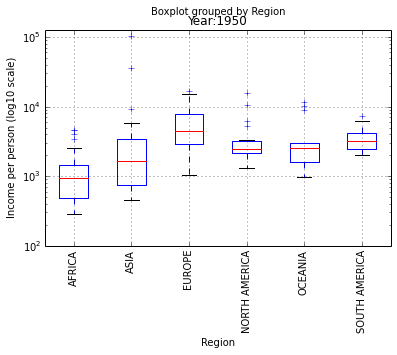

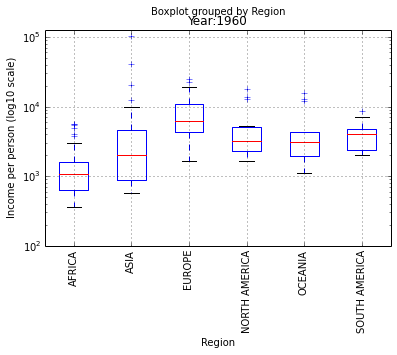

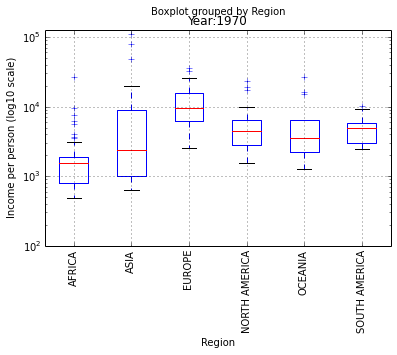

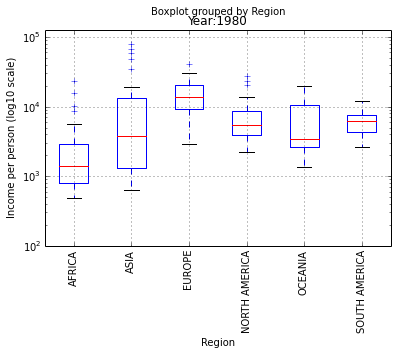

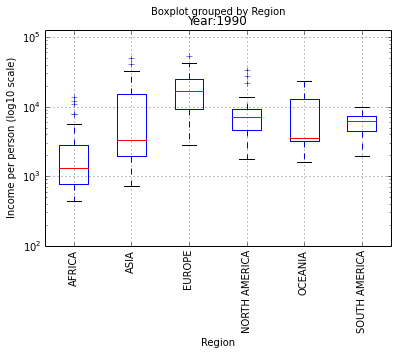

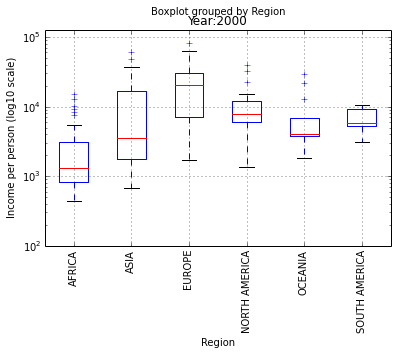

In [19]:
#your code here

years = np.arange(1950, 2010, 10)

for yr in years:
    df = mergeByYear(yr)
    df.boxplot('Income', by = 'Region', rot = 90)
    plt.title("Year:" + str(yr))
    plt.ylabel('Income per person (log10 scale)')
    plt.ylim(10**2, 10.5 **5)
    plt.yscale('log')

In recent years, Africa and Asia have an upwards trend in average income per person while other continents have stayed more constant through the 20th century. 

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

In most continents (especially Africa and Asia), we see that the distribution of incomes is very skewed: most countries are in a group of low-income states with a fat tail of high-income countries that remains approximately constant throughout the 20th century.  In 2(b) we used a histogram to look at the income distribution of all countries in the world for a given year saw a non-normal distribution. In 2(d) we used boxplots to take a closer look at the income distribution of countries grouped by regions across decades.  We saw upward trends in average income per person across certain regions (e.g. Africa) as we moved through the 20th century.

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [20]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

def ratioNormals(diff, a):
    X = scipy.stats.norm(loc=diff, scale=1)
    Y = scipy.stats.norm(loc=0, scale=1) 
    return X.sf(a) / Y.sf(a)

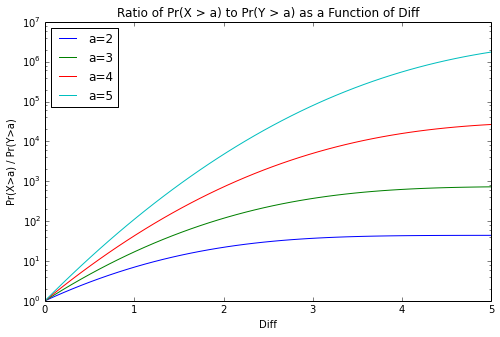

In [21]:
#your code here

# let diff range from 0 to 5 
diffs = np.linspace(0, 5, 50)
a_values = range(2,6)

# Plot separate curves for 
# Pr(X > a) / Pr(Y > a) as a function of diff
# for all given values of a
plt.figure(figsize=(8,5));
for a in a_values:
    ratios = [ratioNormals(diff, a) for diff in diffs]
    plt.plot(diffs, ratios)
    
# Labels
plt.legend(["a={}".format(a) for a in a_values], loc=0);
plt.xlabel('Diff');
plt.ylabel('Pr(X>a) / Pr(Y>a)');
plt.title('Ratio of Pr(X > a) to Pr(Y > a) as a Function of Diff');

# Using a log scale so you can actually see the curves
plt.yscale('log')

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [22]:
#your code here

merged = mergeByYear(2012).groupby('Region', as_index=False).mean()
merged = merged.loc[(merged.Region == "ASIA") | (merged.Region == "SOUTH AMERICA")]
merged.Income = np.round(merged.Income, 2)
merged

,Region,Income
1,ASIA,14510.04
5,SOUTH AMERICA,9471.47


Asia has a larger income compared to South America. We can also create boxplots to see the income distribution of the two continents on the dollar scale and log10(dollar) scale. 

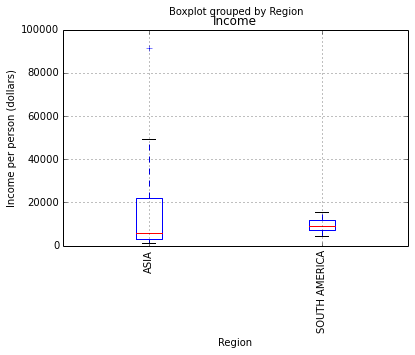

In [23]:
df = mergeByYear(2012)
df = df.loc[(df.Region == "ASIA") | (df.Region == "SOUTH AMERICA")]
df.boxplot('Income', by = 'Region', rot = 90)
plt.ylabel('Income per person (dollars)')

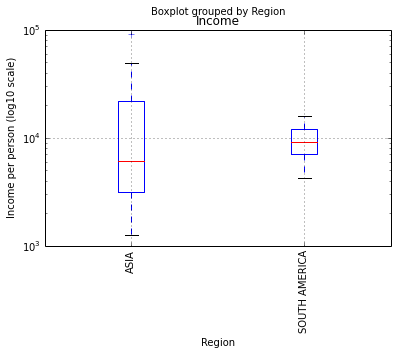

In [24]:
df = mergeByYear(2012)
df = df.loc[(df.Region == "ASIA") | (df.Region == "SOUTH AMERICA")]
df.boxplot('Income', by = 'Region', rot = 90)
plt.ylabel('Income per person (log10 scale)')
plt.yscale('log')

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [25]:
def ratioCountries(groupedData, a):
    prop = [len(group.Income[group.Income >= a]) / float(len(group.Income.dropna())) for key, group in groupedData]
    z = pd.DataFrame(groupedData.mean().index, columns = ['Region'])
    z['Mean'] = np.round(groupedData.mean().values,2)
    z['P(X > %g)' % a] = np.round(prop, 4)
    return z

df = mergeByYear(2012).groupby('Region')
df_ratio = ratioCountries(df, 1e4)
df_ratio = df_ratio[(df_ratio.Region == 'ASIA') | (df_ratio.Region == 'SOUTH AMERICA')]
df_ratio

,Region,Mean,P(X > 10000)
1,ASIA,14510.04,0.3684
5,SOUTH AMERICA,9471.47,0.4167


South America has a larger proportion of countries greater than 10,000 dollars compared to Asia. This is different from the answer in 3(b). Because Asia does not have a normal distribution, the theory in Problem in 3(a) is not applicable here.  

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [26]:
#your code here

# First import the population data:
population_link = 'https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&output=xls'
source = StringIO.StringIO(requests.get(population_link).content)
population = pd.read_excel(source, sheetname = "Data")

# Put years as index and countries as column names
population.columns = ['Country'] + map(int, list(population.columns)[1:])
population.head()

,Country,1700,1730,1750,1785,1786,1787,1788,1789,1790,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26693486,27614718,28420974,29145841,29839994,30577756,31411743,32358260,33397058,34499915
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15700,NaN,NaN,15700,NaN,NaN,NaN,NaN,NaN
3,Albania,300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3124861,3141800,3156607,3169665,3181397,3192723,3204284,3215988,3227373,3238316
4,Algeria,1750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32396048,32888449,33391954,33906605,34428028,34950168,35468208,35980193,36485828,36983924


Consider we have $M$ regions.  Let $R_j$ be the number of countries in the $j^{th}$ region where $j = 1, \ldots, M$.  

If the income per person in a country $i$ is $I_i$, we previously calculated the average income per person over $R_j$ countries in the $j^{th}$ region using the following formula: 
    $$\bar{S}_j = \frac{1}{R_j}\sum_{i=1}^{R_j} I_i$$
Now, we want to consider the average income in a given region adjusting for each countries' population $N_i$. Therefore, we use the following formula to calculate an average income in a given region $R_j$ adjusting for the population in each country: 
     $$ \bar{S}_j = \frac{S_1 + S_2 + \ldots + S_{R_j}}{N_1 + N_2 + \ldots + N_{R_j} } = \frac{N_1 * I_1 + N_2 * I_2 + \ldots + N_{R_j} * I_{R_j}}{N_1 + N_2 + \ldots + N_{R_j} }$$
    
We start by creating a function similar to `mergeByYear()` from 2(c) which merges the income for each country in a given region, but also includes the population for each country. 

In [27]:
def mergeByYearWithPop(year):

    # income DataFrame
    income_df = pd.DataFrame(income.ix[year].values, columns = ['Income'])
    income_df['Country'] = income.columns

    # merge income DataFrame and countries
    joined = pd.merge(income_df, countries, how="inner", on=['Country'])
    
    # population DataFrame
    population_df = population[['Country',year]]

    # merge population DataFrame and joined DataFrame 
    joined = pd.merge(joined, population_df, how="inner", on=['Country'])
    joined.columns = list(joined.columns[:-1])+['TotalPopulation']
    joined.Income = np.round(joined.Income, 2)
    
    def func(df):
        totPop = df.sum()['TotalPopulation']
        dfout = df
        dfout['AdjustedIncome'] = df.Income * df.TotalPopulation / float(totPop)
        dfout.AdjustedIncome = np.round(dfout.AdjustedIncome, 2)
        return dfout
        
    # Group by region
    returnDataFrame = joined.groupby('Region').apply(func)
        
    return returnDataFrame

mergeByYearWithPop(2012).head()

,Income,Country,Region,TotalPopulation,AdjustedIncome
0,1349.70,Afghanistan,ASIA,33397058,11.13
1,6969.31,Albania,EUROPE,3227373,37.68
2,6419.13,Algeria,AFRICA,36485828,246.02
3,NaN,Andorra,EUROPE,87518,NaN
4,5838.16,Angola,AFRICA,20162517,123.65


In [28]:
df = mergeByYearWithPop(2012).groupby('Region').sum()
df.Income = mergeByYear(2012).groupby('Region').mean().Income
df.Income = np.round(df.Income, 2)
df = df.ix[['ASIA', 'SOUTH AMERICA']]
df

,Income,TotalPopulation,AdjustedIncome
ASIA,14510.04,4048448110,6731.66
SOUTH AMERICA,9471.47,400557572,10550.87


In 3(b) we computed the average income per person in each of the regions. The first column in the table above contains the averages from 3(b) (i.e. without adjusting for population). Column 2 contains the total population in the given region. The last column is the average income per person in each of the regions (adjusted for population).  

To compare the boxplots from 3(b), here we plot the income per person for a given region (adjusted for population) on the log10 scale. 

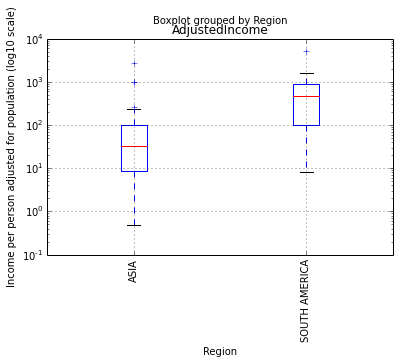

In [29]:
df = mergeByYearWithPop(2012)
df.AdjustedIncome = df['AdjustedIncome']
df = df[(df.Region == 'ASIA') | (df.Region == 'SOUTH AMERICA')]
df.boxplot('AdjustedIncome', by = 'Region', rot = 90)
plt.yscale('log')
plt.ylabel('Income per person adjusted for population (log10 scale)')

Next let's repeat the analysis in 3(c).

In [30]:
def ratioCountries(groupedData, a):
    prop = [len(group.AdjustedIncome[group.AdjustedIncome >= a]) / float(len(group.AdjustedIncome.dropna())) for key, group in groupedData]
    z = pd.DataFrame(groupedData.mean().index, columns = ['Region'])
    z['AdjustedIncome'] = np.round(groupedData.AdjustedIncome.sum().values,2)
    z['P(X > %g)' % a] = np.round(prop,4)
    return z

In [31]:
df = mergeByYearWithPop(2012).groupby('Region')
df_ratio = ratioCountries(df, 1e4)
df_ratio = df_ratio[(df_ratio.Region == 'ASIA') | (df_ratio.Region == 'SOUTH AMERICA')]
df_ratio


,Region,AdjustedIncome,P(X > 10000)
1,ASIA,6731.66,0
5,SOUTH AMERICA,10550.87,0


If we lower the value `a` from 10,000 to 1,000:

In [32]:
df = mergeByYearWithPop(2012).groupby('Region')
df_ratio = ratioCountries(df, 1e3)
df_ratio = df_ratio[(df_ratio.Region == 'ASIA') | (df_ratio.Region == 'SOUTH AMERICA')]
df_ratio

,Region,AdjustedIncome,P(X > 1000)
1,ASIA,6731.66,0.0526
5,SOUTH AMERICA,10550.87,0.1667


The solutions to Problem 3(d) are different because here we are correcting for the countries with the largest populations.  

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

The start of Problem 3 asked: *If group A has larger values than group B on average, does this mean the largest values are from group A?*.  After completely Problem 3, we see the answer is no.  In 2012, Asia had a larger average income per person compared to South America, but because the distributions of Asia and South America are different (e.g. Asia is not normally distributed), we saw the probability of seeing extreme values in Asia is smaller than the probability of seeing extreme values in South America.  When we adjust the incomes for the population of each country, we are correcting for the problem of outliers or the countries with the largest populations. 